# 2. Visualization
## 2.5. Cumulative graph of authors
Do we have enough taxonomic journals to find most taxonomists? Would adding more journals significantly impact the results? 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import openalex

In [19]:
authors = pd.read_pickle("./data/EU27_authors_with_all_taxonomic_articles.pkl")
authors

,Index,article_id,author_position,author_id,author_display_name,orcid,raw_affiliation_string,inst_id,inst_display_name,ror,...,is_in_doaj,source_host_organization,source_host_organization_name,source_host_organization_lineage,source_host_organization_lineage_names,source_type,is_oa,oa_status,oa_url,any_repository_has_fulltext
0,0,https://openalex.org/W2282635459,first,https://openalex.org/A2528062669,Matteo Vecchi,https://orcid.org/0000-0002-7995-6827,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
1,1,https://openalex.org/W2282635459,middle,https://openalex.org/A2143576881,Michele Cesari,https://orcid.org/0000-0001-8857-3791,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
2,2,https://openalex.org/W2282635459,middle,https://openalex.org/A4360091361,Roberto Bertolani,None,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
3,3,https://openalex.org/W2282635459,middle,https://openalex.org/A4335463764,K. Ingemar Jönsson,None,"School of Education and Environment, Kristians...",https://openalex.org/I193278943,Kristianstad University,https://ror.org/00tkrft03,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
4,4,https://openalex.org/W2282635459,middle,https://openalex.org/A2077559806,Lorena Rebecchi,https://orcid.org/0000-0002-0702-1846,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25098,49489,https://openalex.org/W4253410054,last,https://openalex.org/A2118604301,Josef Starý,https://orcid.org/0000-0002-9440-4254,Institute of Soil Biology,https://openalex.org/I4210124224,Institute of Soil Biology,https://ror.org/02tz8r820,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,False,closed,None,False
25099,49490,https://openalex.org/W4254963337,first,https://openalex.org/A4357507713,Maciej Skoracki,None,"Department of Animal Morphology, Adam Mickiewi...",https://openalex.org/I173161963,University of Prešov,https://ror.org/02ndfsn03,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,True,bronze,https://doi.org/10.21684/0132-8077-2019-27-2-2...,False
25100,49496,https://openalex.org/W4255590455,last,https://openalex.org/A4355237428,Jenő Kontschán,None,"Plant Protection Institute, Centre for Agricul...",https://openalex.org/I4210156273,Plant Protection Institute,https://ror.org/052t9a145,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,True,bronze,https://doi.org/10.21684/0132-8077-2019-27-2-1...,True
25101,49497,https://openalex.org/W4285411966,f

In [15]:
articles = pd.read_pickle("./data/keyword_filtered_articles_EU27_with_taxonomy_concept_in_journal.pkl")
articles = openalex.flatten_works(articles)
articles

,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,...,is_in_doaj,source_host_organization,source_host_organization_name,source_host_organization_lineage,source_host_organization_lineage_names,source_type,is_oa,oa_status,oa_url,any_repository_has_fulltext
0,https://openalex.org/W2282635459,https://doi.org/10.1071/is15033,Integrative systematic studies on tardigrades ...,Integrative systematic studies on tardigrades ...,2016,2016-08-31,{'openalex': 'https://openalex.org/W2282635459...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
1,https://openalex.org/W1534942643,https://doi.org/10.1071/is13002,Morphological and molecular insights on Megalo...,Morphological and molecular insights on Megalo...,2013,2013-01-01,{'openalex': 'https://openalex.org/W1534942643...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,False,closed,None,False
2,https://openalex.org/W2159262135,https://doi.org/10.1071/is13030,Two distinct evolutionary lineages of the Asta...,Two distinct evolutionary lineages of the Asta...,2014,2014-01-01,{'openalex': 'https://openalex.org/W2159262135...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,False,closed,None,False
3,https://openalex.org/W2271608622,https://doi.org/10.1071/is15023,Molecular evidence for non-monophyly of the pi...,Molecular evidence for non-monophyly of the pi...,2016,2016-01-01,{'openalex': 'https://openalex.org/W2271608622...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,False,closed,None,False
4,https://openalex.org/W2209115793,https://doi.org/10.1071/is14019,Mitochondrial DNA analyses reveal widespread t...,Mitochondrial DNA analyses reveal widespread t...,2015,2015-01-01,{'openalex': 'https://openalex.org/W2209115793...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://oa.upm.es/40973/1/INVE_MEM_2015_224830...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11649,https://openalex.org/W4253285772,https://doi.org/10.21684/0132-8077-2019-27-2-1...,"MERISTACARUS BOCHKOVI (ACARI, ORIBATIDA, LOHMA...","MERISTACARUS BOCHKOVI (ACARI, ORIBATIDA, LOHMA...",2019,2019-12-30,{'openalex': 'https://openalex.org/W4253285772...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,False,closed,None,False
11650,https://openalex.org/W4253410054,https://doi.org/10.21684/0132-8077-2021-29-1-3-9,TAXONOMIC CONTRIBUTION TO THE KNOWLEDGE OF THE...,TAXONOMIC CONTRIBUTION TO THE KNOWLEDGE OF THE...,2021,2021-01-01,{'openalex': 'https://openalex.org/W4253410054...,en,"{'is_oa': False, 'landing_page_url': 'https://...",journal-article,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,False,closed,None,False
11651,https://openalex.org/W4254963337,https://doi.org/10.21684/0132-8077-2019-27-2-2...,A NEW SYRINGOPHILID MITE (ACARIFORMES: SYRINGO...,A NEW SYRINGOPHILID MITE (ACARIFORMES: SYRINGO...,2019,2019-12-30,{'openalex': 'https://openalex.org/W4254963337...,en,"{'is_oa': True, 'landing_page_url': 'http

In [34]:
authors = authors.drop_duplicates(subset=["author_id", "source_display_name"])
authors

,Index,article_id,author_position,author_id,author_display_name,orcid,raw_affiliation_string,inst_id,inst_display_name,ror,...,is_in_doaj,source_host_organization,source_host_organization_name,source_host_organization_lineage,source_host_organization_lineage_names,source_type,is_oa,oa_status,oa_url,any_repository_has_fulltext
0,0,https://openalex.org/W2282635459,first,https://openalex.org/A2528062669,Matteo Vecchi,https://orcid.org/0000-0002-7995-6827,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
1,1,https://openalex.org/W2282635459,middle,https://openalex.org/A2143576881,Michele Cesari,https://orcid.org/0000-0001-8857-3791,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
2,2,https://openalex.org/W2282635459,middle,https://openalex.org/A4360091361,Roberto Bertolani,None,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
3,3,https://openalex.org/W2282635459,middle,https://openalex.org/A4335463764,K. Ingemar Jönsson,None,"School of Education and Environment, Kristians...",https://openalex.org/I193278943,Kristianstad University,https://ror.org/00tkrft03,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
4,4,https://openalex.org/W2282635459,middle,https://openalex.org/A2077559806,Lorena Rebecchi,https://orcid.org/0000-0002-0702-1846,Department of Life Sciences University of Mode...,https://openalex.org/I122346577,University of Modena and Reggio Emilia,https://ror.org/02d4c4y02,...,unknown,https://openalex.org/P4310320302,CSIRO Publishing,[https://openalex.org/P4310320302],[CSIRO Publishing],journal,True,green,https://iris.unimore.it/bitstream/11380/110720...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25097,49487,https://openalex.org/W4253285772,last,https://openalex.org/A2289382229,Stanislav Kalúz,None,"Institute of Zoology, Slovak Academy of Scienc...",https://openalex.org/I207624831,Slovak Academy of Sciences,https://ror.org/03h7qq074,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,False,closed,None,False
25099,49490,https://openalex.org/W4254963337,first,https://openalex.org/A4357507713,Maciej Skoracki,None,"Department of Animal Morphology, Adam Mickiewi...",https://openalex.org/I173161963,University of Prešov,https://ror.org/02ndfsn03,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,True,bronze,https://doi.org/10.21684/0132-8077-2019-27-2-2...,False
25100,49496,https://openalex.org/W4255590455,last,https://openalex.org/A4355237428,Jenő Kontschán,None,"Plant Protection Institute, Centre for Agricul...",https://openalex.org/I4210156273,Plant Protection Institute,https://ror.org/052t9a145,...,unknown,https://openalex.org/P4310312765,University of Tyumen,[https://openalex.org/P4310312765],[University of Tyumen],journal,True,bronze,https://doi.org/10.21684/0132-8077-2019-27-2-1...,True
25101,49497,https://openalex.org/W4285411966,firs

In [35]:
authors[["article_id", "source_display_name"]].groupby(["source_display_name"]) \
                                              .count() \
                                              .reset_index() \
                                              .sort_values(["article_id"], ascending=False)

,source_display_name,article_id
95,Zootaxa,3259
54,Molecular Phylogenetics and Evolution,1480
67,Phytotaxa,1414
89,ZooKeys,634
80,Taxon,479
...,...,...
13,Australian Mammalogy,1
87,Tulane Studies in Geology and Paleontology,1
62,Novitates paleoentomologicae,1
52,Korean Journal of Plant Taxonomy,1


In [57]:
a = list(set(authors["source_display_name"]))
a.remove("Zootaxa")
a

['Adansonia',
 'Cryptogamie Mycologie',
 'Fungal Diversity',
 'Novosti sistematiki vysših rastenij',
 'Graellsia',
 'Zoologica Scripta',
 'Integrative systematics',
 'Systematic Botany',
 'Bulletin of The Museum of Comparative Zoology',
 'Holotipus',
 'Aquatic Insects',
 'Annales Zoologici',
 'Sydowia',
 'Fungal systematics and evolution',
 'Acarina',
 'Contributions to zoology',
 'Elytron',
 'Journal of insect biodiversity',
 'Bonn zoological Bulletin',
 'Trudy Zoologičeskogo instituta',
 'Phytotaxa',
 'Transactions of The American Entomological Society',
 'Taxonomy',
 'Candollea',
 'Haseltonia',
 'Willdenowia',
 'Zoosystematics and Evolution',
 'Cryptogamie Algologie',
 'ZooKeys',
 'Polish Botanical Journal',
 'Molecular Phylogenetics and Evolution',
 'Annales De La Societe Entomologique De France',
 'Persoonia',
 'IMA fungus',
 'Plant and Fungal Systematics',
 'Mycoscience',
 'Systematics and Biodiversity',
 'Mycological Progress',
 'Novitates paleoentomologicae',
 'Kew Bulletin',
 

In [56]:
a

In [67]:
# start with Zootaxa (has most authors)
nr_authors_path = [len(authors[authors["source_display_name"]=="Zootaxa"]),] 
journal_path = ["Zootaxa",]
unexplored = list(set(authors["source_display_name"]))
unexplored.remove("Zootaxa")
authors_seen = list(authors[authors["source_display_name"]=="Zootaxa"]["author_id"])

# dictionary with only journal name and author ids is easier to compare 
journal_authors = {}
for journal in set(articles["source_display_name"]):
    journal_authors[journal] = list(authors[authors["source_display_name"]==journal]["author_id"])

# find out how many of the authors in a proposed journal have already been seen
def not_in_common(authors1, journal2):
    authors2 = journal_authors[journal2]
    # get number of authors in journal2 not in total author list so far
    n = 0
    for author in authors2:
        if author not in authors1:
            n += 1
    return n

nr_journals = len(set(authors["source_display_name"]))

# find path of least resistance through journals
while len(journal_path) < nr_journals:
    best_journal = ""
    best_author_nr = 0

    # go over every unexplored journal to find out if they're the best
    for j in unexplored:
        new_blood = not_in_common(authors_seen, j)
        # save best journal
        if new_blood > best_author_nr:
            best_author_nr = new_blood
            best_journal = j
    
    if best_author_nr == 0:
        break
        
    # add to path
    authors_seen.extend(journal_authors[best_journal])
    journal_path.append(best_journal)
    nr_authors_path.append(best_author_nr)
    print("Next best: "+journal_path[-1])
    
    unexplored.remove(best_journal)

Next best: Phytotaxa
Next best: Molecular Phylogenetics and Evolution
Next best: Mycological Progress
Next best: ZooKeys
Next best: Taxon
Next best: Journal of Systematic Palaeontology
Next best: Zoologica Scripta
Next best: Fungal Diversity
Next best: Systematic Biology
Next best: Journal of Zoological Systematics and Evolutionary Research
Next best: European journal of taxonomy
Next best: Zoologischer Anzeiger
Next best: Systematic Entomology
Next best: Systematics and Biodiversity
Next best: Willdenowia
Next best: Persoonia
Next best: Journal of Systematics and Evolution
Next best: Nematology
Next best: Annales Zoologici
Next best: Systematic & Applied Acarology
Next best: Studies in Mycology
Next best: Invertebrate Systematics
Next best: Acarologia
Next best: Annales Botanici Fennici
Next best: Zoosystema
Next best: Organisms Diversity & Evolution
Next best: PhytoKeys
Next best: Cryptogamie Algologie
Next best: Acta Entomologica Musei Nationalis Pragae
Next best: Systematic Parasit

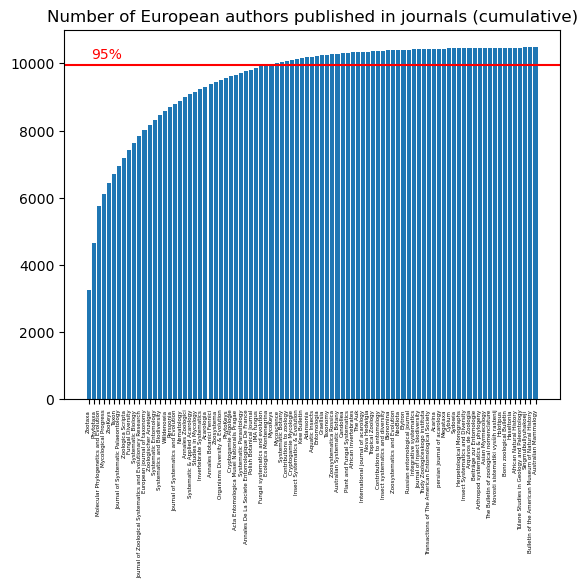

<Figure size 640x480 with 0 Axes>

In [72]:
fig, ax = plt.subplots()

# plot path through journals with most new authors, cumulatively
cumulative_path = np.cumsum(nr_authors_path)

plt.bar(x=journal_path, height=cumulative_path)
plt.xticks(rotation=90, ha="center", fontsize=4)
ax.set_title("Number of European authors published in journals (cumulative)")

# add 95% line
value_95 = cumulative_path[-1]*0.95
plt.axhline(y=value_95, color="red", label="95%")
ax.text(0.5, value_95+200,"95%", color="red")
plt.show()

plt.savefig("./figures/cumulative_graph_european_authors_in_journals.png")